In [24]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as ssp
import sklearn.linear_model as sklm

In [75]:
def Ravg(V,T,sigma,k):
    u = (V-T)/(np.sqrt(2)*sigma)
    A = k*sigma/np.sqrt(2) * u * (1 + ssp.erf(u))
    B = k*sigma/np.sqrt(2) * 1/np.sqrt(np.pi) * np.exp(-u**2)
    return A, B

In [78]:
Ravg(V,T,sigma,k)

(-0.0, 0.0)

In [116]:
T = 0
k = 1
NV = 200
Nsigma = 200
R = np.zeros((NV,Nsigma))
Vs = np.linspace(-30,-1,NV)
sigmas = np.logspace(-1,1,Nsigma)
for iV,V in enumerate(Vs):
    for isigma,sigma in enumerate(sigmas):
        R[iV,isigma] = np.array(Ravg(V,T,sigma,k)).sum()

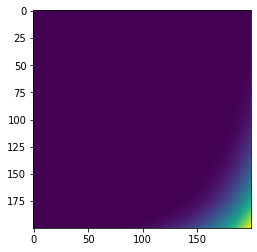

In [117]:
plt.figure()
plt.imshow(R)

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


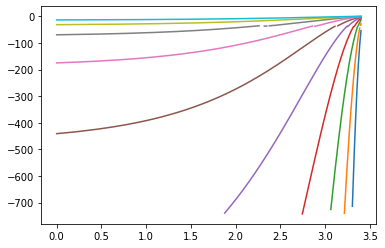

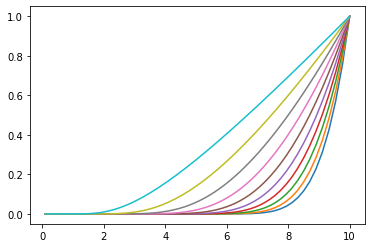

In [119]:
plt.figure()
for i in range(0,NV,20):
    plt.plot(np.log(Vs-Vs.min()+1),np.log(R[:,i]))
plt.figure()
for i in range(0,NV,20):
    plt.plot(sigmas,R[i]/R[i].max())

/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  app.launch_new_instance()
/home/mossing/anaconda3/envs/py3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using t

<Figure size 432x288 with 0 Axes>

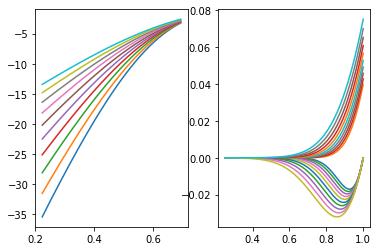

In [76]:
T = 1
sigma = 0.2
k = 1
plt.figure()
V = np.linspace(0.25,1,300)
plt.figure()
sigmas = np.logspace(-1,0.5,50)[:10]
slopes = []
intercepts = []
for sigma in sigmas:
    x = np.log(V)
    A,B = Ravg(V,T,sigma,k)
    y = np.log(A + B)
    plt.subplot(1,2,1)
    plt.plot(x,y)
    plt.subplot(1,2,2)
    plt.plot(V,A)
    plt.plot(V,A+B)
    model = sklm.LinearRegression().fit(x[:,np.newaxis],y[:,np.newaxis])
    slopes.append(model.coef_[0,0])
    intercepts.append(model.intercept_[0])
slopes = np.array(slopes)
intercepts = np.array(intercepts)

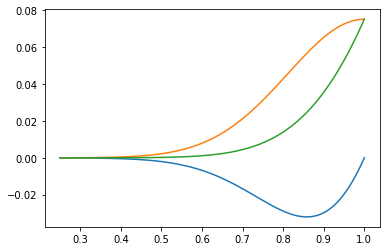

In [74]:
plt.figure()
plt.plot(V,A)
plt.plot(V,B)
plt.plot(V,A+B)

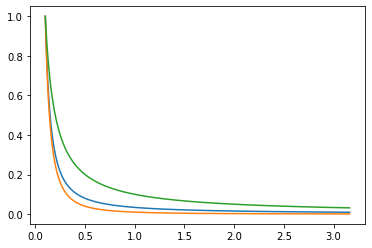

In [66]:
plt.figure()
plt.plot(sigmas,slopes/slopes.max())
plt.plot(sigmas,sigmas.min()**2/sigmas**2)
plt.plot(sigmas,sigmas.min()/sigmas)

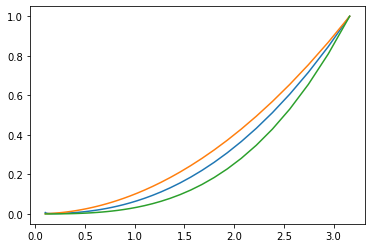

In [67]:
plt.figure()
plt.plot(sigmas,10**(intercepts-intercepts.max()))
plt.plot(sigmas,sigmas**2/sigmas.max()**2)
plt.plot(sigmas,sigmas**3/sigmas.max()**3)
# plt.plot(sigmas,sigmas.min()**2/sigmas**2)
# plt.plot(sigmas,sigmas.min()/sigmas)

In [46]:
sigmas

array([0.1       , 0.11993539, 0.14384499, 0.17252105, 0.20691381,
       0.24816289, 0.29763514, 0.35696988, 0.42813324, 0.51348329,
       0.61584821, 0.73861998, 0.88586679, 1.06246783, 1.27427499,
       1.52830673, 1.83298071, 2.19839265, 2.6366509 , 3.16227766])